In [1]:
from google.colab import drive #드라이브 연동
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install import_ipynb #다른 노트북 파일 import
import import_ipynb

%cd /content/drive/MyDrive/프로젝트3조/

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
/content/drive/MyDrive/프로젝트3조


## 1-1. Python 필요 패키지 인스톨 부분

In [3]:
# matplotlib 패키지 없을 시 실행 할것
!pip install matplotlib

In [4]:
# 지도시각화 패키지 인스톨
!pip install folium

## 1-2. Python 필수 패키지 import

In [5]:
#1. Import 패키지 선언
#<필수패키지 선언>
import pandas as pd
import numpy as np
import seaborn as sns
#<부가패키지 선언>
import folium
import json

# 주요 컬럼 값이 한글이기에 한글 폰트 적용 부분

In [6]:
#1. 한글폰트 및 이미지처리 패키지 선언
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

#경고 메세지
import warnings
warnings.filterwarnings('ignore')

!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 2-1. DataFrame 사용변수 정의

#표
데이터내역|DataFrame 공통변수 원본|DataFrame 공통변수 복사본
-|-|-
세종특별자치시_신장 체중 등록 내역_20231231|base_hw|df_hw
세종특별자치시_인바디 측정 내역_20231231|base_inbody|df_inbody
세종특별자치시_스트레스 측정 내역_20231231|base_stress|df_stress
세종특별자치시_혈압 측정 내역_20231231|base_blood|df_blood
국민건강보험공단_건강검진정보_20231231|base_health|df_health
2024년_7월_말_기준_인구현황(세종)|base_population|df_population
병원정보서비스 2021.12 |base_hospital|df_hospital
약국정보서비스 2021.12|base_pharmacy|df_pharmacy
우편번호|base_zip|df_zip
통합측정자료(공통)|base_check|df_check

참고) 통합측정자료는 추후 생성되며 별도 파일이 있는 것은 아님

## 2-2. 분석 데이타셋 파일 로드 부분

## 필요한 부분만 사용하시면 됩니다.
## 로드할 데이터셋 파일 원본/복사본 분리 부분 (공통변수 적용에 따른 규약 적용)
## 필요한 부분만 실행하여 로그할 것 전체 로드 할 경우 메모리 부하 발생될 수도 있음
## 위 데이터프레임 변수명 참고하세요

## ------------------------분석작업 순서-------------------
## 1단계 데이터셋 구성 파악 할것
##  - 종속/독립 변수의 파악, 데이터행 및 타입, Na컬럼 갯수 파악 : info() , shpae
##  - 데이터 형태 파악 : head(5)
##  - 테이터 분포 파악 : describe() , 시각화 boxplot(), .plot.hist() , (.value_counts(), .plot.bar())
## 2단계 전처리 작업
##  - Na 컬럼제거 및 대체
##  - 이상치 제거
##  - 1단계 필수 컬럼 생성 : 나이, 동명, 지도시각화 코드
##  - 혈압/비만은 이상치제거 시 해당 내역을 별도 DataFrame으로 만들어 둘것 (분석시 활용하지 않으나, 추후 연계분석 시 중증환자군으로 유의미 부여 필요)
## 3단계 분석 및 시각화 수행
##  - 통합측정자료(공통) 데이터프레임 생성하여 이용현황 분석
##  - 각 업무별 데이터셋분석
##  - 병원/질명/이상치 질병건수 등 연계 분석 실시

In [7]:
#2. CVS파일을 로드하여 DataFrame생성
#2-1-1 신장 체중 등록 내역 파일 로드
base_wh = pd.read_csv('/content/drive/MyDrive/프로젝트3조/data/세종특별자치시_신장 체중 등록 내역_20231231.csv', encoding='cp949')
df_wh = base_wh.copy()
df_wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   사용자 고유번호  100279 non-null  object 
 1   측정일자      100279 non-null  object 
 2   측정시간      100279 non-null  object 
 3   성별        100279 non-null  object 
 4   사용자 출생년도  100279 non-null  int64  
 5   행정동명      100279 non-null  object 
 6   체중        100279 non-null  float64
 7   신장        99724 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.1+ MB


In [8]:
df_wh.shape

(100279, 8)

In [9]:
df_wh.describe()

,사용자 출생년도,체중,신장
count,100279.000000,100279.000000,99724.000000
mean,1977.639675,64.313371,165.778913
std,10.548624,11.927514,8.415399
min,1938.000000,10.000000,90.100000
25%,1972.000000,55.700000,160.000000
50%,1978.000000,61.800000,165.100000
75%,1983.000000,71.800000,171.700000
max,2016.000000,500.000000,200.000000


In [10]:
#2. CVS파일을 로드하여 DataFrame생성
#2-1-2 인바디 측정 내역 파일 로드
base_inbody = pd.read_csv('/content/drive/MyDrive/프로젝트3조/data/세종특별자치시_인바디 측정 내역_20231231.csv', encoding='cp949')
df_inbody = base_inbody.copy()
df_inbody.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21120 entries, 0 to 21119
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사용자 고유번호   21120 non-null  object 
 1   측정일자       21120 non-null  object 
 2   측정시간       21120 non-null  object 
 3   성별         21120 non-null  object 
 4   사용자 출생년도   21120 non-null  int64  
 5   행정동명       21120 non-null  object 
 6   체중         21120 non-null  float64
 7   총체수분       21120 non-null  float64
 8   단백질        21120 non-null  float64
 9   무기질        21120 non-null  float64
 10  체지방량       21120 non-null  float64
 11  근육량        21120 non-null  float64
 12  제지방량       21120 non-null  float64
 13  골격근량       21120 non-null  int64  
 14  체질량지수      21120 non-null  float64
 15  체지방률       21120 non-null  int64  
 16  오른팔 근육량    21120 non-null  float64
 17  왼팔 근육량     21120 non-null  float64
 18  몸통 근육량     21120 non-null  float64
 19  오른다리 근육량   21120 non-null  float64
 20  왼다리 근육

In [11]:
#2. CVS파일을 로드하여 DataFrame생성
#2-1-3 혈압 측정 내역 파일 로드
base_blood = pd.read_csv('/content/drive/MyDrive/프로젝트3조/data/세종특별자치시_인바디 측정 내역_20231231.csv', encoding='cp949')
df_blood = base_blood.copy()
df_blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21120 entries, 0 to 21119
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사용자 고유번호   21120 non-null  object 
 1   측정일자       21120 non-null  object 
 2   측정시간       21120 non-null  object 
 3   성별         21120 non-null  object 
 4   사용자 출생년도   21120 non-null  int64  
 5   행정동명       21120 non-null  object 
 6   체중         21120 non-null  float64
 7   총체수분       21120 non-null  float64
 8   단백질        21120 non-null  float64
 9   무기질        21120 non-null  float64
 10  체지방량       21120 non-null  float64
 11  근육량        21120 non-null  float64
 12  제지방량       21120 non-null  float64
 13  골격근량       21120 non-null  int64  
 14  체질량지수      21120 non-null  float64
 15  체지방률       21120 non-null  int64  
 16  오른팔 근육량    21120 non-null  float64
 17  왼팔 근육량     21120 non-null  float64
 18  몸통 근육량     21120 non-null  float64
 19  오른다리 근육량   21120 non-null  float64
 20  왼다리 근육

In [12]:
#2. CVS파일을 로드하여 DataFrame생성
#2-1-4 스트레스 측정 내역 파일 로드
base_stress = pd.read_csv('/content/drive/MyDrive/프로젝트3조/data/세종특별자치시_스트레스 측정 내역_20231231.csv', encoding='cp949')
df_stress = base_stress.copy()
df_stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580 entries, 0 to 8579
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   사용자 고유번호      8580 non-null   object 
 1   측정일자          8580 non-null   object 
 2   측정시간          8580 non-null   object 
 3   성별            8580 non-null   object 
 4   사용자 출생년도      8580 non-null   int64  
 5   행정동명          8580 non-null   object 
 6    평균심박수        8580 non-null   int64  
 7    이상심박수        8580 non-null   int64  
 8   자율신경활성도 값     8580 non-null   float64
 9    자율신경활성도 단계   8580 non-null   int64  
 10   피로도 값        8580 non-null   float64
 11   피로도 단계       8580 non-null   int64  
 12   심장안정도 값      8580 non-null   float64
 13   심장안정도 단계     8580 non-null   int64  
 14   자율신경 균형도     8580 non-null   int64  
 15   신체스트레스 값     8580 non-null   float64
 16   신체스트레스 단계    8580 non-null   int64  
 17   정신스트레스 값     8580 non-null   float64
 18   정신스트레스 단계    8580 non-null 

In [13]:
#2. CVS파일을 로드하여 DataFrame생성
#2-2-1 `23년도 국민겅간보험공단 건강검진정보 파일 로드
base_health = pd.read_csv('/content/drive/MyDrive/프로젝트3조/data/국민건강보험공단_건강검진정보_2023.CSV', encoding='cp949')
df_health = base_health.copy()
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자일련번호        1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대코드(5세단위)    1000000 non-null  int64  
 5   신장(5cm단위)      1000000 non-null  int64  
 6   체중(5kg단위)      1000000 non-null  int64  
 7   허리둘레           999589 non-null   float64
 8   시력(좌)          999816 non-null   float64
 9   시력(우)          999823 non-null   float64
 10  청력(좌)          999863 non-null   float64
 11  청력(우)          999862 non-null   float64
 12  수축기혈압          994253 non-null   float64
 13  이완기혈압          994253 non-null   float64
 14  식전혈당(공복혈당)     994186 non-null   float64
 15  총콜레스테롤         338606 non-null   float64
 16  트리글리세라이드       338606 non-null   float64
 17  HDL콜레스테롤 

In [14]:
#2. CVS파일을 로드하여 DataFrame생성
#2-2-2 2024년_7월_말_기준_인구현황(세종) 파일 로드 (엑셀파일)
base_population = pd.read_excel(io='/content/drive/MyDrive/프로젝트3조/data/2024년_7월_말_기준_인구현황.xlsx', sheet_name='인구')
df_population = base_population.copy()
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   행정동        25 non-null     object 
 1   구분         25 non-null     object 
 2   전체인구       25 non-null     int64  
 3   지역별전체인구비율  25 non-null     float64
 4   내국인계       25 non-null     int64  
 5   지역별내국인비율   25 non-null     float64
 6   전월대비증감     25 non-null     int64  
 7   남자         25 non-null     int64  
 8   남자구성비      25 non-null     float64
 9   여자         25 non-null     int64  
 10  여자구성비      25 non-null     float64
 11  외국인계       25 non-null     int64  
 12  지역별외국인비율   25 non-null     float64
 13  전월증감       25 non-null     int64  
 14  외국인남자      25 non-null     int64  
 15  외국인여자      25 non-null     int64  
 16  세대수        25 non-null     int64  
 17  전월대비증감.1   25 non-null     int64  
 18  세대당인구      25 non-null     float64
 19  비고         4 non-null      object 
dtypes: float64(6

In [15]:
#2. CVS파일을 로드하여 DataFrame생성
#2-2-3 건강보험심사평가원_2021.12/1. 병원정보서비스 2021.12.xlsx 파일 로드 (엑셀파일)
base_hospital = pd.read_excel(io='/content/drive/MyDrive/프로젝트3조/data/건강보험심사평가원_2021.12/1. 병원정보서비스 2021.12.xlsx')
df_hospital = base_hospital.copy()
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74756 entries, 0 to 74755
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   암호화요양기호     74756 non-null  object        
 1   요양기관명       74756 non-null  object        
 2   종별코드        74756 non-null  int64         
 3   종별코드명       74756 non-null  object        
 4   시도코드        74756 non-null  int64         
 5   시도코드명       74756 non-null  object        
 6   시군구코드       74756 non-null  int64         
 7   시군구코드명      74756 non-null  object        
 8   읍면동         29872 non-null  object        
 9   우편번호        74756 non-null  int64         
 10  주소          74756 non-null  object        
 11  전화번호        74411 non-null  object        
 12  병원URL       9001 non-null   object        
 13  개설일자        74710 non-null  datetime64[ns]
 14  총의사수        74756 non-null  int64         
 15  의과일반의 인원수   74756 non-null  int64         
 16  의과인턴 인원수    74756 non-

In [16]:
#2. CVS파일을 로드하여 DataFrame생성
#2-2-4 건강보험심사평가원_2021.12/2. 약국정보서비스 2021.12.xlsx 파일 로드 (엑셀파일)
base_pharmacy = pd.read_excel(io='/content/drive/MyDrive/프로젝트3조/data/건강보험심사평가원_2021.12/2. 약국정보서비스 2021.12.xlsx')
df_pharmacy = base_pharmacy.copy()
df_pharmacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23840 entries, 0 to 23839
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   암호화요양기호  23840 non-null  object        
 1   요양기관명    23840 non-null  object        
 2   종별코드     23840 non-null  int64         
 3   종별코드명    23840 non-null  object        
 4   시도코드     23840 non-null  int64         
 5   시도코드명    23840 non-null  object        
 6   시군구코드    23840 non-null  int64         
 7   시군구코드명   23840 non-null  object        
 8   읍면동      11351 non-null  object        
 9   우편번호     23839 non-null  float64       
 10  주소       23840 non-null  object        
 11  전화번호     23362 non-null  object        
 12  개설일자     23808 non-null  datetime64[ns]
 13  x좌표      23329 non-null  float64       
 14  y좌표      23329 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 2.7+ MB


In [17]:
#2. CVS파일을 로드하여 DataFrame생성
#2-2-4 세종특별시 우편번호 파일 로드
base_zip = pd.read_csv('/content/drive/MyDrive/프로젝트3조/data/세종특별자치시_우편번호.csv')
df_zip = base_zip.copy()
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27655 entries, 0 to 27654
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   우편번호      27655 non-null  int64  
 1   시도        27655 non-null  object 
 2   시도영문      27655 non-null  object 
 3   시군구       0 non-null      float64
 4   시군구영문     0 non-null      float64
 5   읍면        25837 non-null  object 
 6   읍면영문      25837 non-null  object 
 7   도로명코드     27655 non-null  float64
 8   도로명       27655 non-null  object 
 9   도로명영문     27655 non-null  object 
 10  지하여부      27655 non-null  int64  
 11  건물번호본번    27655 non-null  int64  
 12  건물번호부번    27655 non-null  int64  
 13  건물관리번호    27655 non-null  float64
 14  다량배달처명    0 non-null      float64
 15  시군구용건물명   1922 non-null   object 
 16  법정동코드     27655 non-null  int64  
 17  법정동명      1818 non-null   object 
 18  리명        25837 non-null  object 
 19  행정동명      11580 non-null  object 
 20  산여부       27655 non-null  in

# 1단계 데이터셋 구성 파악 할것
#  - 종속/독립 변수의 파악, 데이터행 및 타입, Na컬럼 갯수 파악 : info() , shpae
#  - 데이터 형태 파악 : head(5)
#  - 테이터 분포 파악 : describe() , 시각화 boxplot(), .plot.hist() , (.value_counts(), .plot.bar())

## 예시 df_hw   ---> adf_hw  로 작업하시면 됩니다.
## 분석 작업시 생성되는 DataFrame은 다음같이 정의합니다.
## 명명규칙 : DataFrame명 + "_" + 이름약어 + "-" + 주고싶은 별도 명칭
예시) adf_hw_ssa_name1
#* 추후 하나의 파일로 작성하기 좋을 듯 합니다.

## 전처리 작업으로 완료된 데이터셋 파일은 df대신 adf 로 적용하고 기본 데이터프레임으로 사용할것임

In [18]:
#column 이름의 앞 뒤 공백 제거
base_stress.columns = base_stress.columns.str.lstrip()
df_stress=base_stress.copy()

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

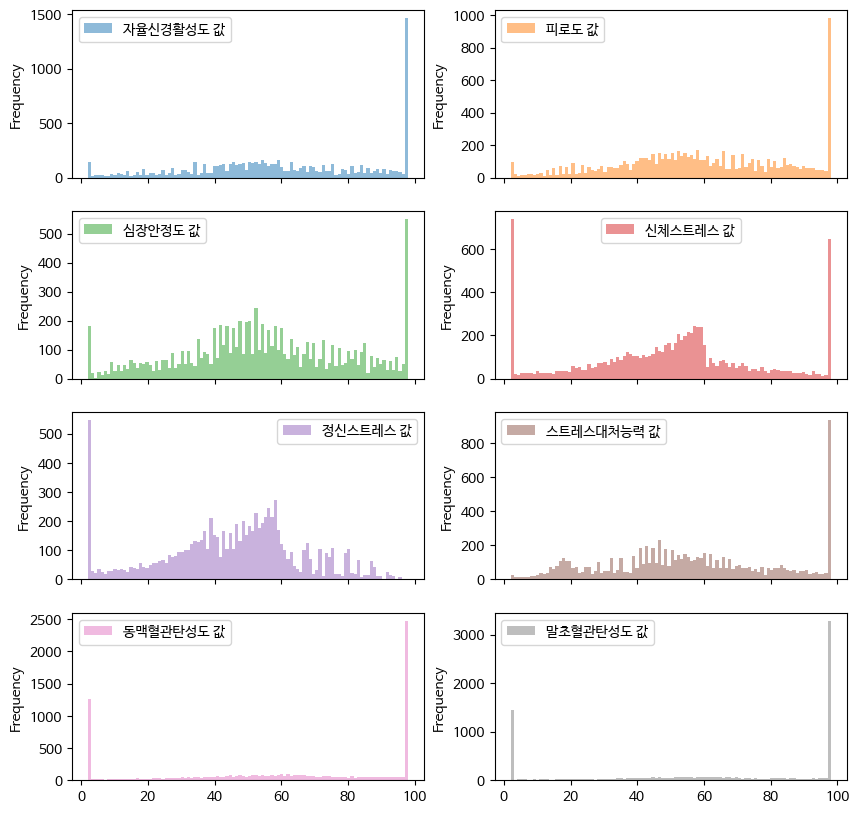

In [19]:
#데이터 분포 조회#
base_stress[['자율신경활성도 값', '피로도 값', '심장안정도 값', '신체스트레스 값', '정신스트레스 값', '스트레스대처능력 값', '동맥혈관탄성도 값','말초혈관탄성도 값']].plot(kind='hist', bins=100, alpha=0.5, subplots=True, layout=(4, 2), figsize=(10, 10))


In [20]:
#이상치 제거
df_stress_vessel= base_stress[~base_stress[['자율신경활성도 값', '피로도 값', '심장안정도 값', '신체스트레스 값', '정신스트레스 값','스트레스대처능력 값', '동맥혈관탄성도 값' ,'말초혈관탄성도 값']].isin([2, 98]).any(axis=1)]#둘다 전처리
df_stress= base_stress[~base_stress[['자율신경활성도 값', '피로도 값', '심장안정도 값', '신체스트레스 값', '정신스트레스 값','스트레스대처능력 값']].isin([2, 98]).any(axis=1)]#스트레스만 전처리
df_vessel= base_stress[~base_stress[['동맥혈관탄성도 값' ,'말초혈관탄성도 값']].isin([2, 98]).any(axis=1)]#혈관만 전처리

In [77]:
#전처리 마무리
adf_vessel=df_vessel.copy()
adf_stress=df_stress.copy()
adf_stress_vessel=df_stress_vessel.copy()
# '측정 일자'를 날짜 형식으로 변환

adf_stress['측정일자'] = pd.to_datetime(adf_stress['측정일자'], format='%Y-%m-%d')
adf_vessel['측정일자'] = pd.to_datetime(adf_vessel['측정일자'], format='%Y-%m-%d')
adf_stress_vessel['측정일자'] = pd.to_datetime(adf_stress_vessel['측정일자'], format='%Y-%m-%d')
#나이 행 추가
adf_stress['나이'] = 2023 - adf_stress['사용자 출생년도']
adf_vessel['나이']= 2023 - adf_vessel['사용자 출생년도']
adf_stress_vessel['나이'] = 2023 - adf_stress_vessel['사용자 출생년도']

#연령대

adf_stress['연령대'] = (adf_stress['나이'] // 10 * 10).astype(str) + '대'

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

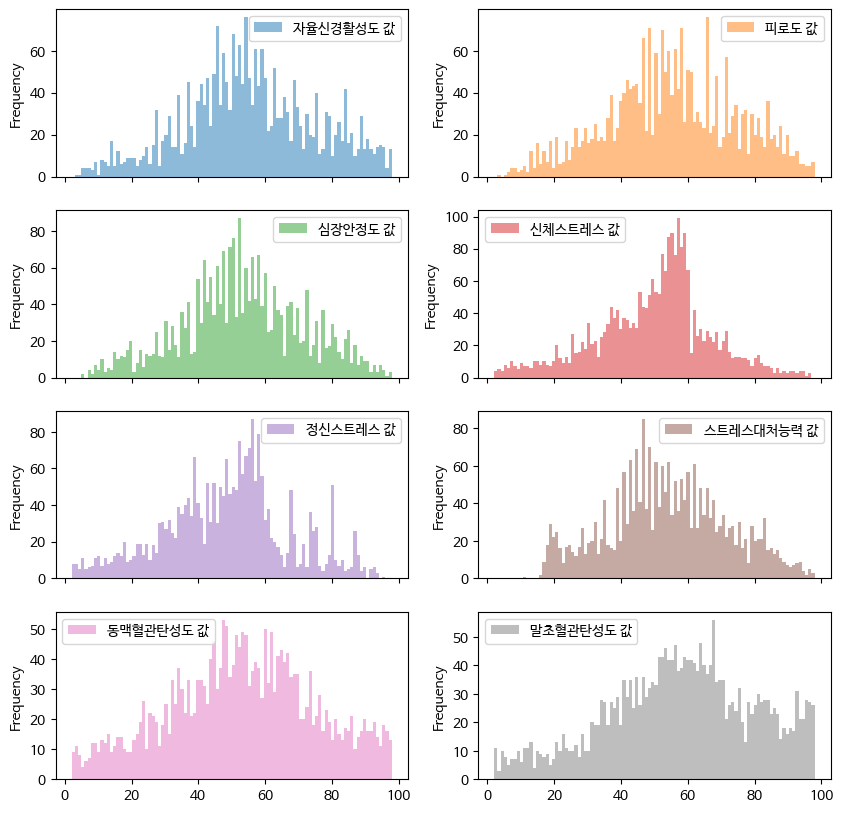

In [22]:
#이상치 제거 후 분포
df_stress_vessel[['자율신경활성도 값', '피로도 값', '심장안정도 값', '신체스트레스 값', '정신스트레스 값', '스트레스대처능력 값', '동맥혈관탄성도 값','말초혈관탄성도 값']].plot(kind='hist', bins=100, alpha=0.5, subplots=True, layout=(4, 2), figsize=(10, 10))

In [23]:
#전처리 전 후 실제 사용자 수

base_stress['사용자 고유번호'].nunique()

1465

In [24]:
df_stress['사용자 고유번호'].nunique()

1259

In [25]:
df_vessel['사용자 고유번호'].nunique()

862

In [26]:
#전처리 전 후 측정값 분포
base_stress.value_counts('행정동명')

,count
행정동명,
아름동,1348
한솔동,1109
새롬동,1011
도담동,843
반곡동,750
종촌동,551
보람동,482
고운동,450
다정동,393


In [27]:
df_stress['행정동명'].value_counts()

,count
행정동명,
아름동,950
한솔동,733
새롬동,691
도담동,605
반곡동,485
종촌동,373
보람동,365
고운동,344
다정동,276


행정동명
아름동     0.295252
한솔동     0.339044
새롬동     0.316518
도담동     0.282325
반곡동     0.353333
종촌동     0.323049
보람동     0.242739
고운동     0.235556
다정동     0.297710
해밀동     0.355844
나성동     0.295880
조치원읍    0.149194
소담동     0.323529
연기면     0.140969
Name: count, dtype: float64


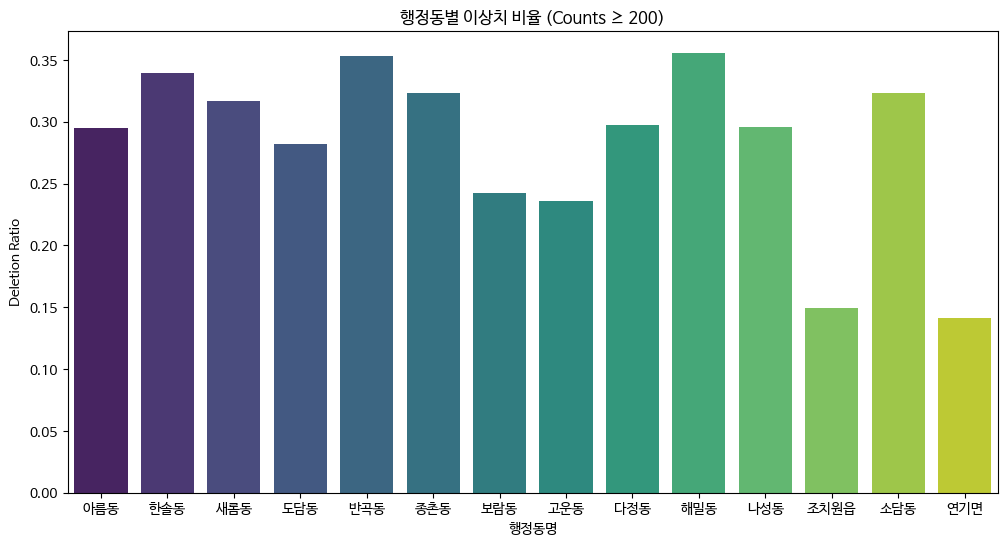

In [28]:
#스트레스 이상치 비율
#200개 이상인 '행정동명' 값에 대한 전처리 전후 개수 비교 및 삭제된 비율 계산
#문헌에 따른 표본 크기에 대한 절대적 기준 (Williams et al., 2012)에 따르면 200개 이상이면 괜찮은 수준의 표본 사이즈

base_counts = base_stress['행정동명'].value_counts()
filtered_counts = base_counts[base_counts >= 200]

# 전처리 이후 데이터에서 해당 항목들만 남기기
after_counts = df_stress['행정동명'].value_counts().reindex(filtered_counts.index, fill_value=0)

# 삭제된 비율 계산
deleted_ratios = (filtered_counts - after_counts) / filtered_counts

# 결과 출력
print(deleted_ratios)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=deleted_ratios.index, y=deleted_ratios.values, palette='viridis')
plt.title('행정동별 이상치 비율 (Counts ≥ 200)')
plt.xlabel('행정동명')
plt.ylabel('Deletion Ratio')
plt.show()

행정동명
아름동     0.643175
한솔동     0.706943
새롬동     0.714144
도담동     0.531435
반곡동     0.664000
종촌동     0.539020
보람동     0.651452
고운동     0.555556
다정동     0.646310
해밀동     0.646753
나성동     0.737828
조치원읍    0.415323
소담동     0.781513
연기면     0.991189
Name: count, dtype: float64


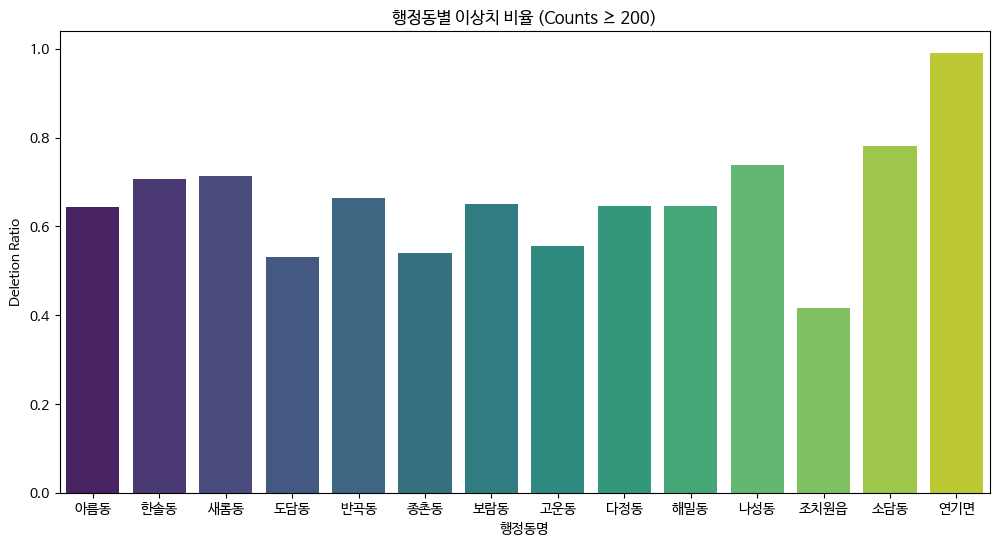

In [29]:
#혈관 이상치 비율
#200개 이상인 '행정동명' 값에 대한 전처리 전후 개수 비교 및 삭제된 비율 계산
#문헌에 따른 표본 크기에 대한 절대적 기준 (Williams et al., 2012)에 따르면 200개 이상이면 괜찮은 수준의 표본 사이즈

base_counts = base_stress['행정동명'].value_counts()
filtered_counts = base_counts[base_counts >= 200]

# 전처리 이후 데이터에서 해당 항목들만 남기기
after_counts = df_vessel['행정동명'].value_counts().reindex(filtered_counts.index, fill_value=0)

# 삭제된 비율 계산
deleted_ratios = (filtered_counts - after_counts) / filtered_counts

# 결과 출력
print(deleted_ratios)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=deleted_ratios.index, y=deleted_ratios.values, palette='viridis')
plt.title('행정동별 이상치 비율 (Counts ≥ 200)')
plt.xlabel('행정동명')
plt.ylabel('Deletion Ratio')
plt.show()


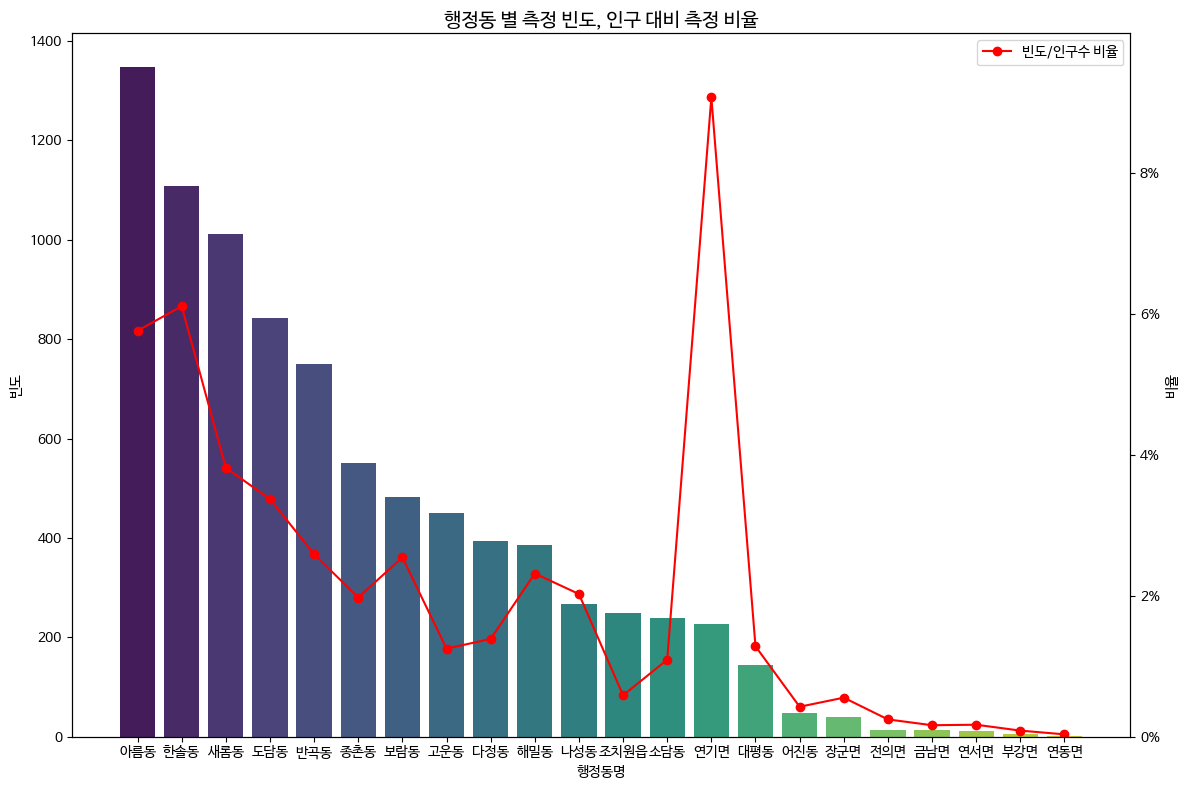

In [30]:
# 행정동명 빈도 계산
value_counts = base_stress['행정동명'].value_counts()

# 행정동명에 맞는 인구수를 가져옴
matching_population = df_population.set_index('행정동').loc[value_counts.index, '전체인구']

# 빈도 / 인구수 비율 계산
ratio = value_counts / matching_population

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# 꺾은선 그래프 추가 (두 번째 축을 사용)
ax1 = plt.gca()  # 현재 축 가져오기
ax2 = ax1.twinx()  # 두 번째 축 생성

ax2.plot(value_counts.index, ratio, color='red', marker='o', linestyle='-', label='빈도/인구수 비율')
ax2.set_ylabel('비율', fontsize=10)

# 오른쪽 축을 백분율로 변환하여 레이블을 표시
ax2.set_ylim(0, max(ratio) * 1.1)  # y축 범위를 기존 비율의 최대치보다 약간 크게 설정

# 오른쪽 y축 레이블을 백분율로 설정
ax2.set_yticklabels([f'{int(tick * 100):d}%' for tick in ax2.get_yticks()])

# 제목과 x축 레이블 설정
plt.title('행정동 별 측정 빈도, 인구 대비 측정 비율', fontsize=14)
plt.xlabel('행정동명', fontsize=10)
ax1.set_ylabel('빈도', fontsize=10)

# x축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, fontsize=8)

# 범례 설정
ax2.legend(loc='upper right')

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

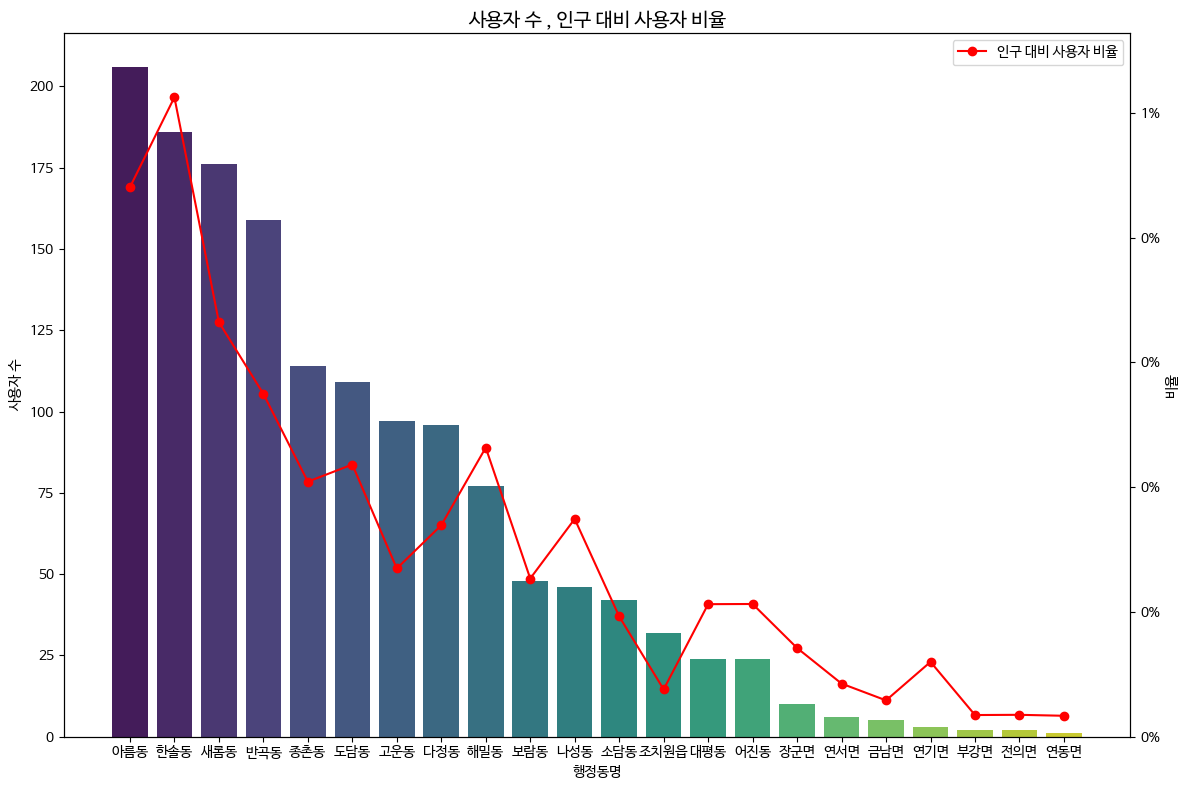

In [31]:
# 행정동명별 사용자 고유번호의 종류 개수 계산
real_count = base_stress.groupby('행정동명')['사용자 고유번호'].nunique()

# 행정동명에 맞는 인구수를 가져옴
matching_population = df_population.set_index('행정동').loc[real_count.index, '전체인구']

# 사용자 수 / 인구수 비율 계산
ratio = real_count / matching_population

# real_count를 기준으로 내림차순 정렬
real_count = real_count.sort_values(ascending=False)
ratio = ratio.loc[real_count.index]  # 비율도 동일한 순서로 정렬

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x=real_count.index, y=real_count.values, palette="viridis")

# 꺾은선 그래프 추가 (두 번째 축을 사용)
ax1 = plt.gca()  # 현재 축 가져오기
ax2 = ax1.twinx()  # 두 번째 축 생성

ax2.plot(real_count.index, ratio, color='red', marker='o', linestyle='-', label='인구 대비 사용자 비율')
ax2.set_ylabel('비율', fontsize=10)

# 오른쪽 축을 백분율로 변환하여 레이블을 표시
ax2.set_ylim(0, max(ratio) * 1.1)  # y축 범위를 기존 비율의 최대치보다 약간 크게 설정

# 오른쪽 y축 레이블을 백분율로 설정
ax2.set_yticklabels([f'{int(tick * 100):d}%' for tick in ax2.get_yticks()])

# 제목과 x축 레이블 설정
plt.title('사용자 수 , 인구 대비 사용자 비율', fontsize=14)
plt.xlabel('행정동명', fontsize=10)
ax1.set_ylabel('사용자 수', fontsize=10)

# x축 레이블 회전 및 폰트 크기 조정
plt.xticks(rotation=45, fontsize=8)

# 범례 설정
ax2.legend(loc='upper right')

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()


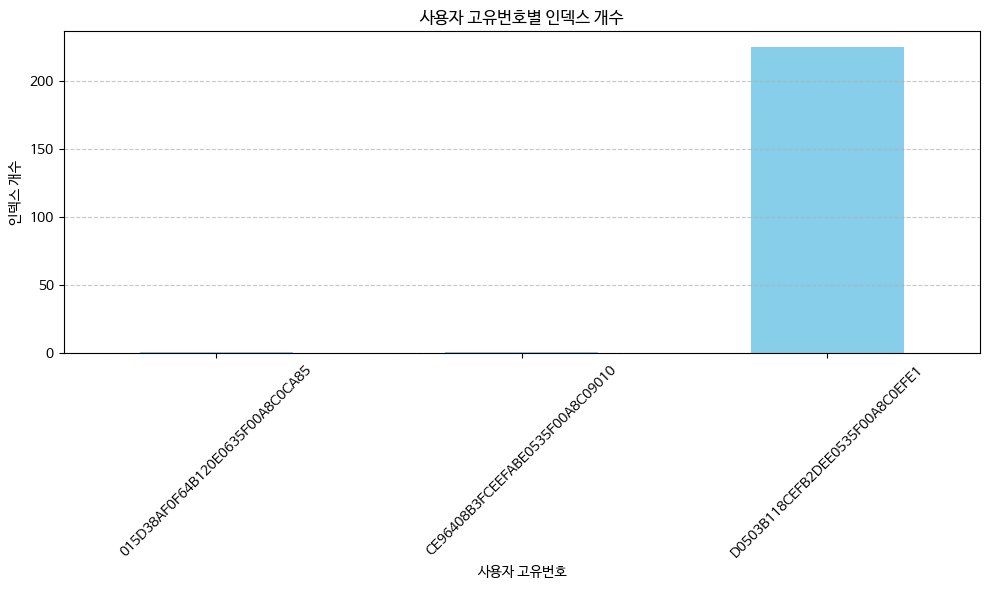

In [32]:
filtered_df = base_stress[base_stress['행정동명'] == '연기면']

# '사용자 고유번호'별로 그룹화하고 인덱스 개수 세기
index_counts = filtered_df.groupby('사용자 고유번호').size()

# 그래프 그리기
plt.figure(figsize=(10, 6))
index_counts.plot(kind='bar', color='skyblue')
plt.xlabel('사용자 고유번호')
plt.ylabel('인덱스 개수')
plt.title('사용자 고유번호별 인덱스 개수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#연기면의 데이터의 99%가 한 사람에 의한 측정값

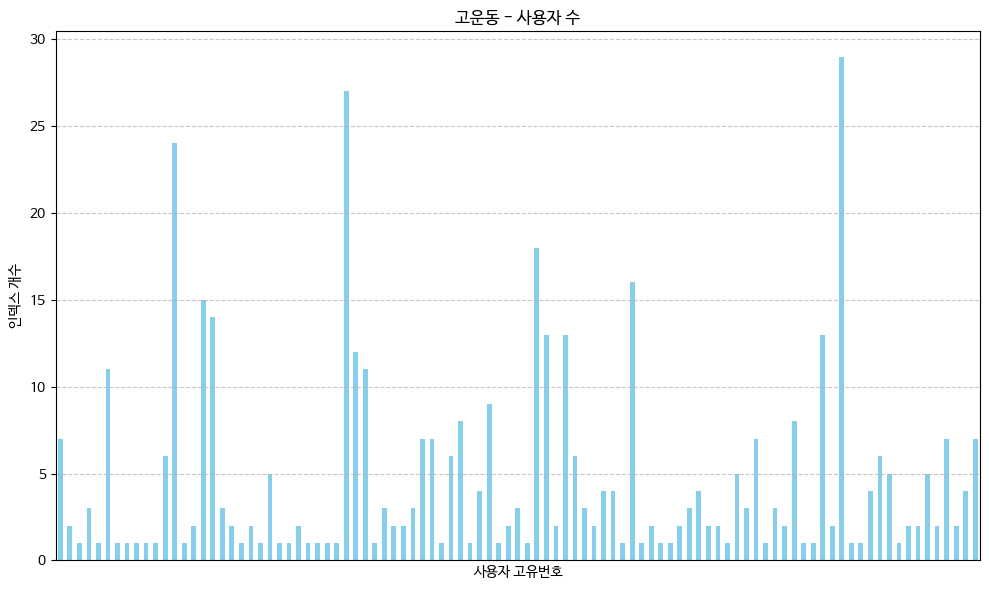

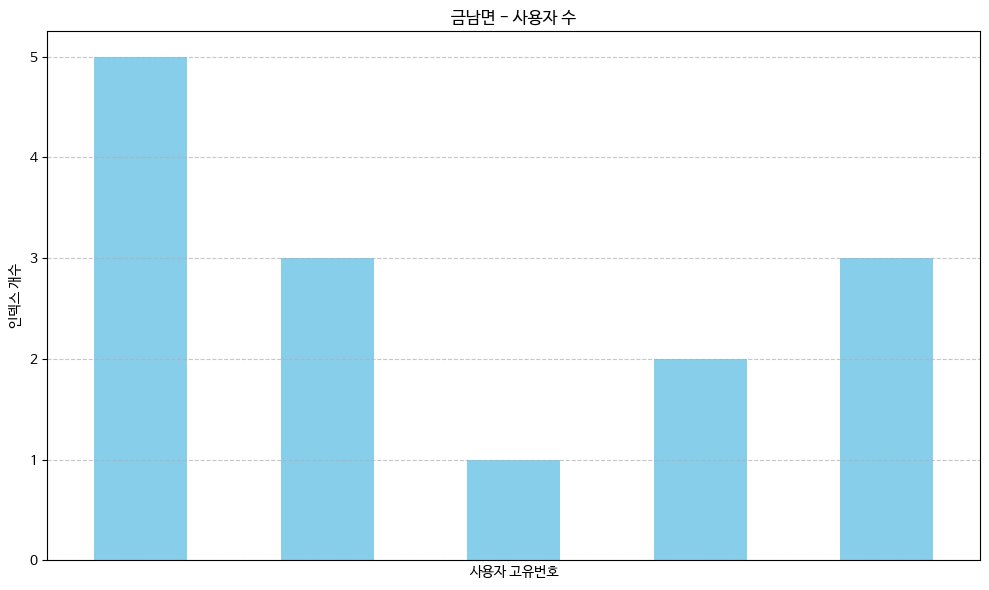

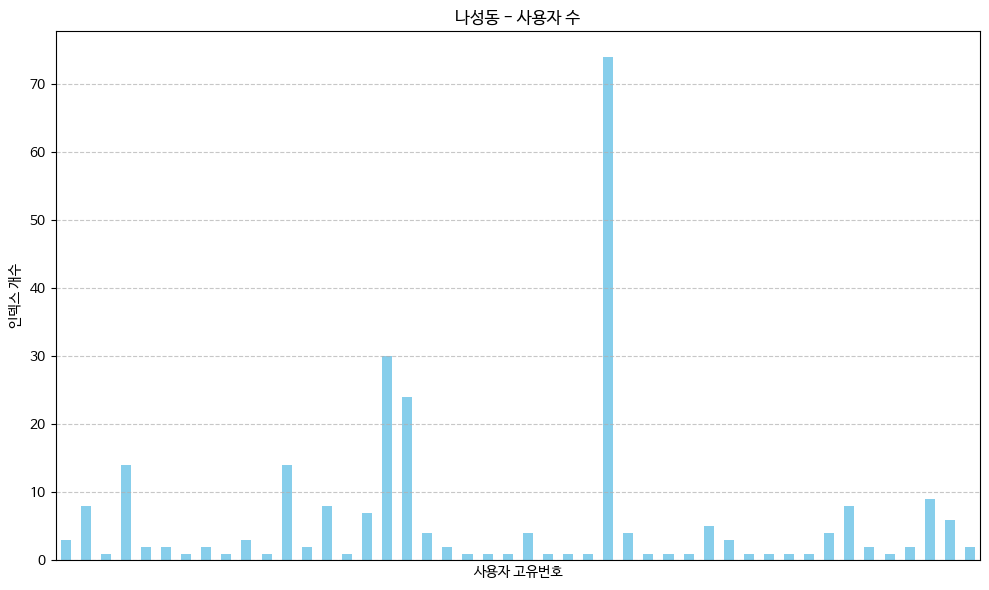

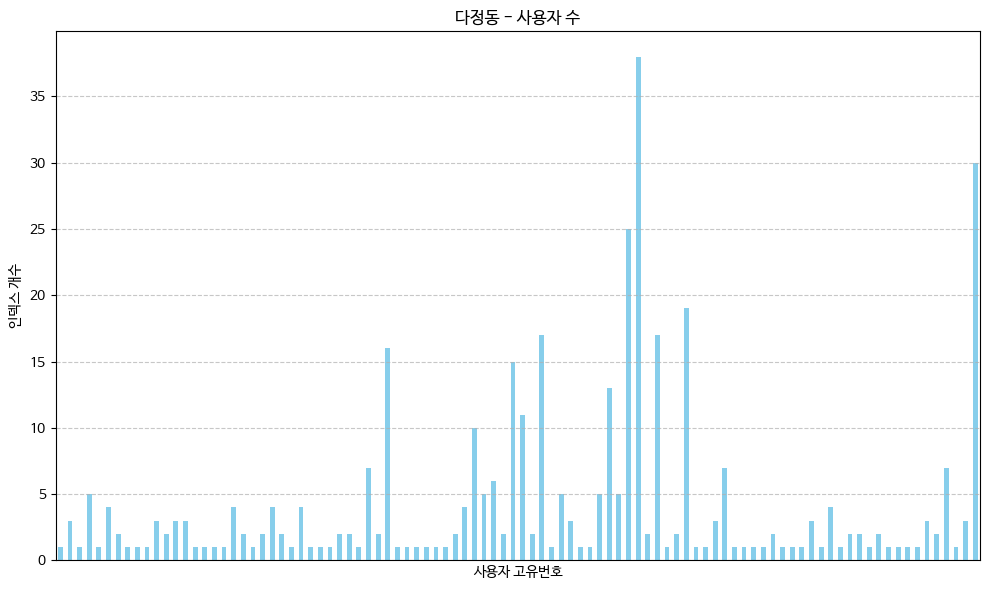

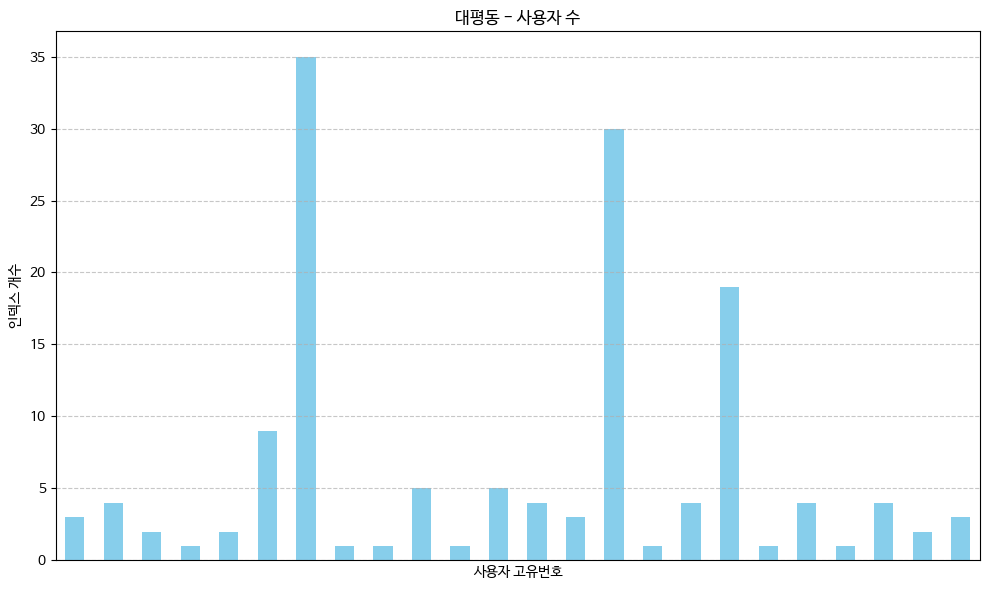

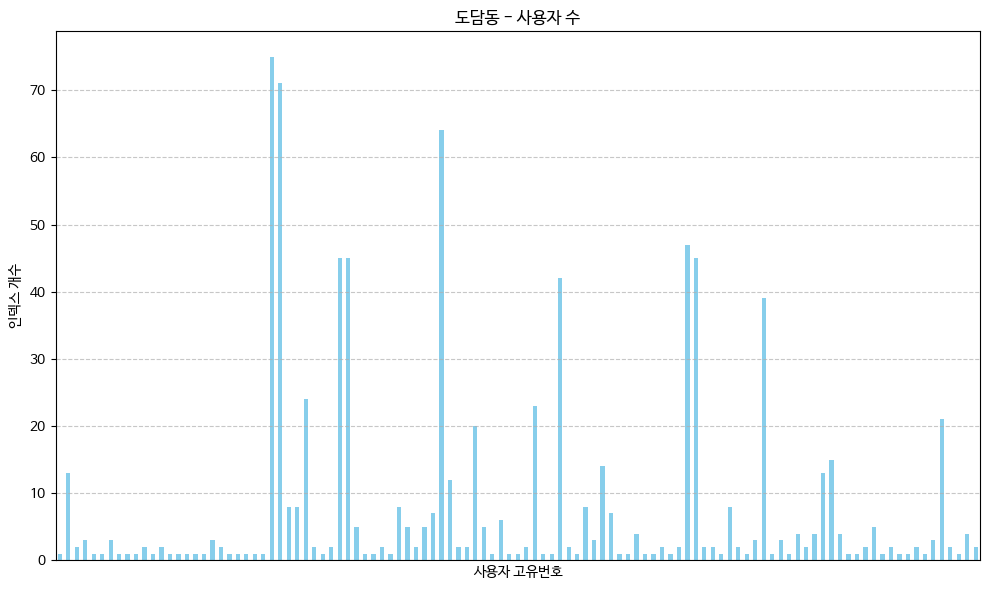

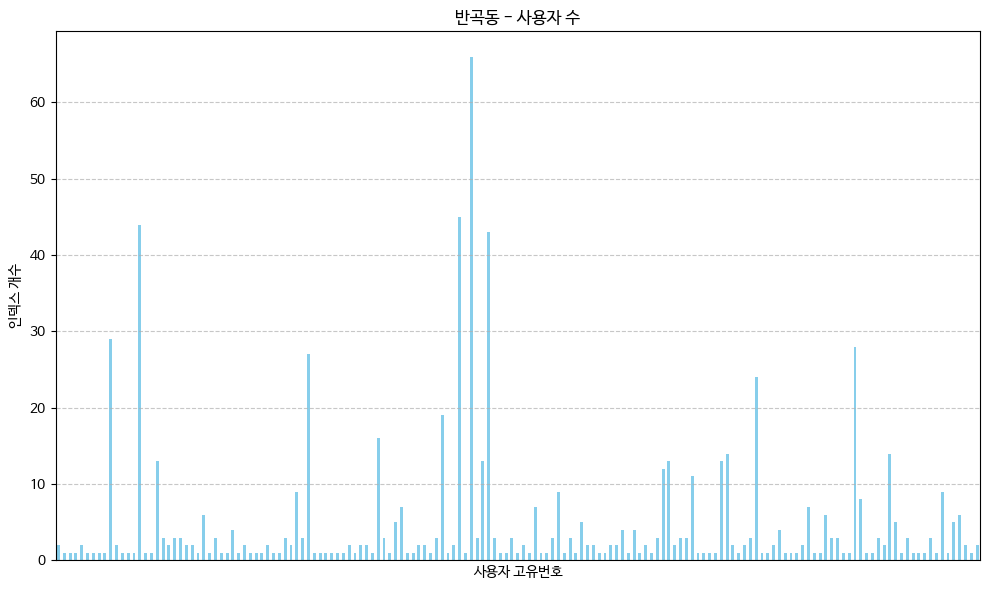

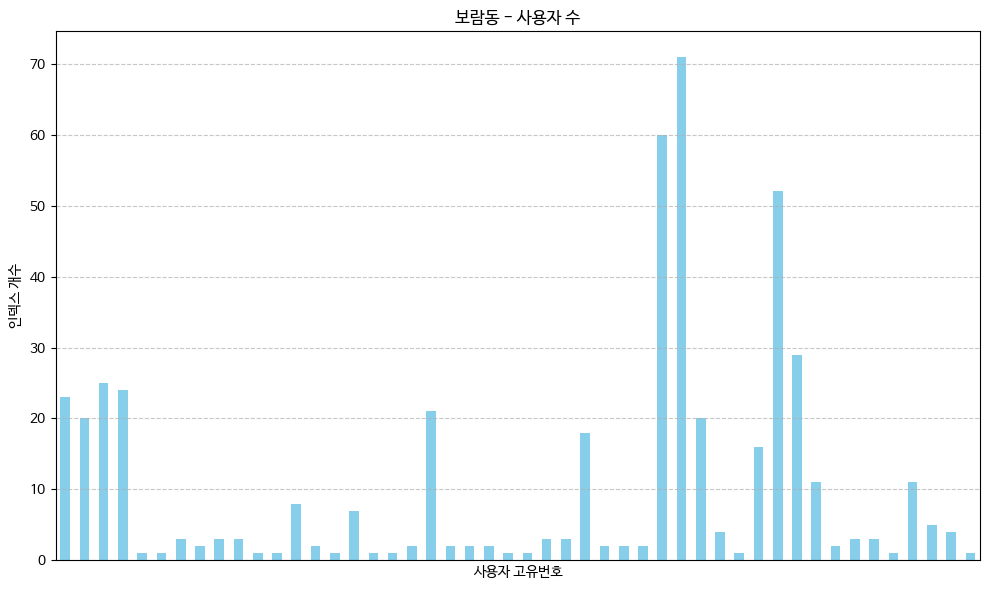

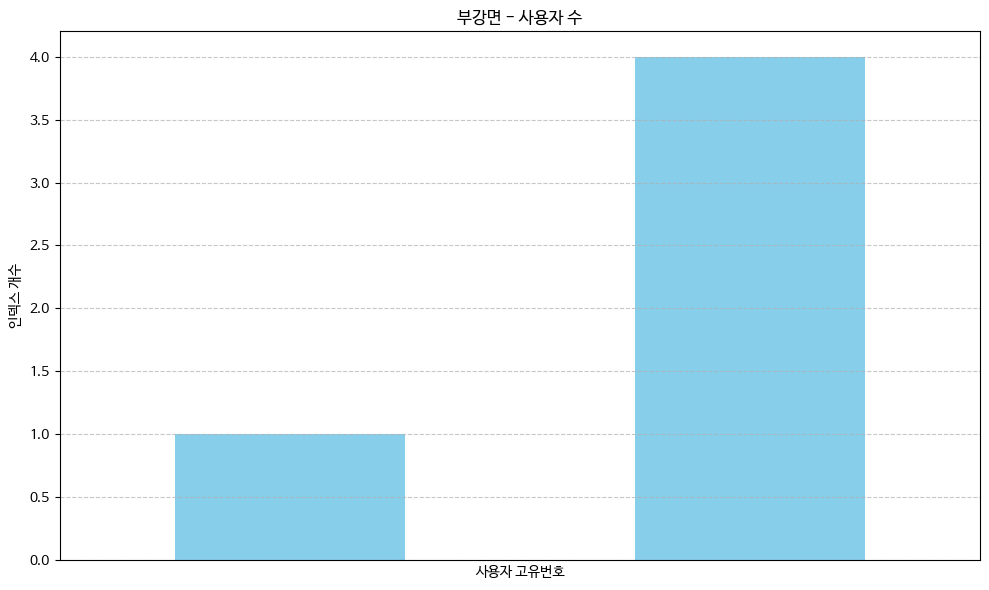

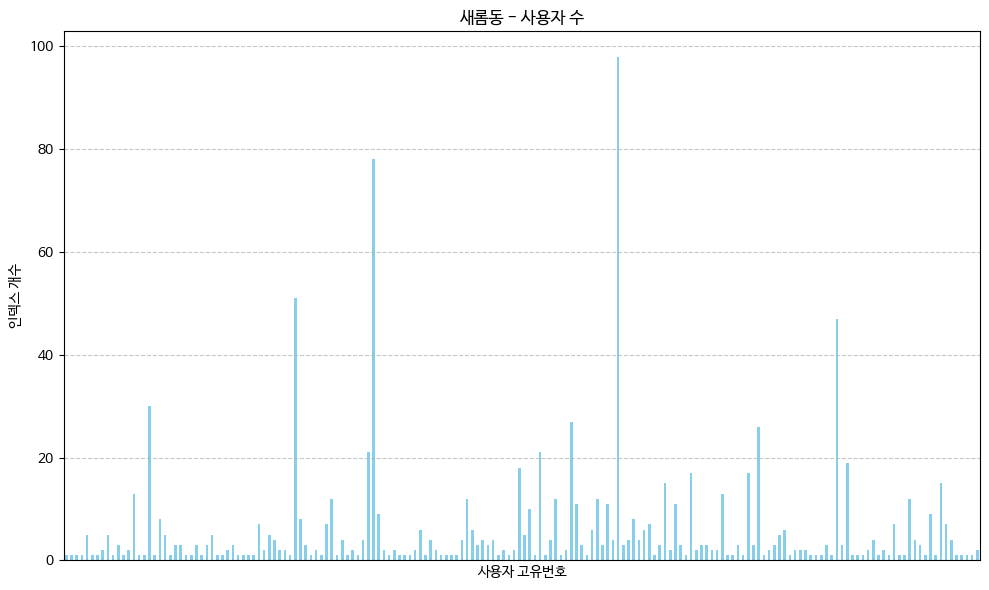

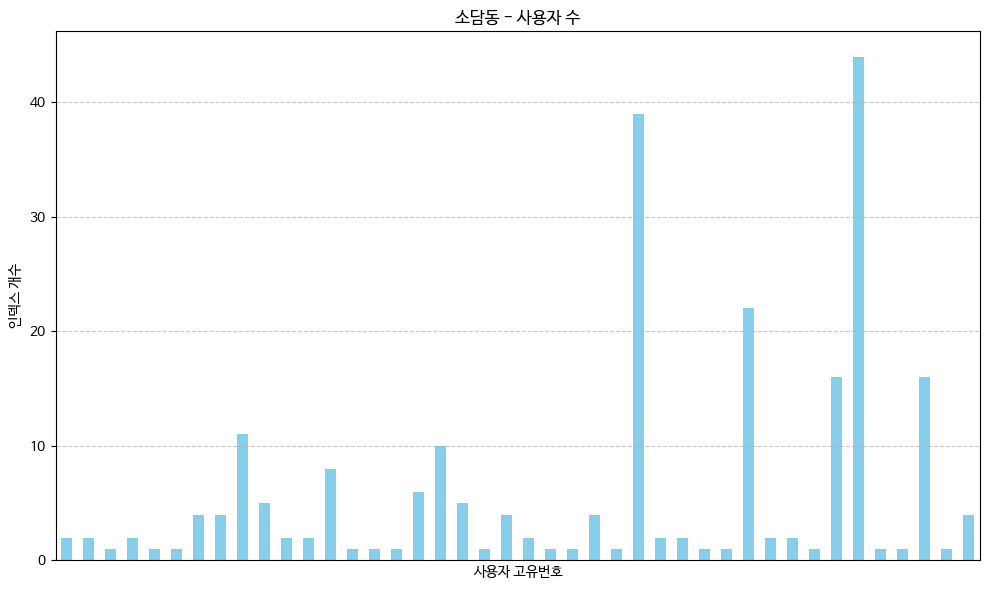

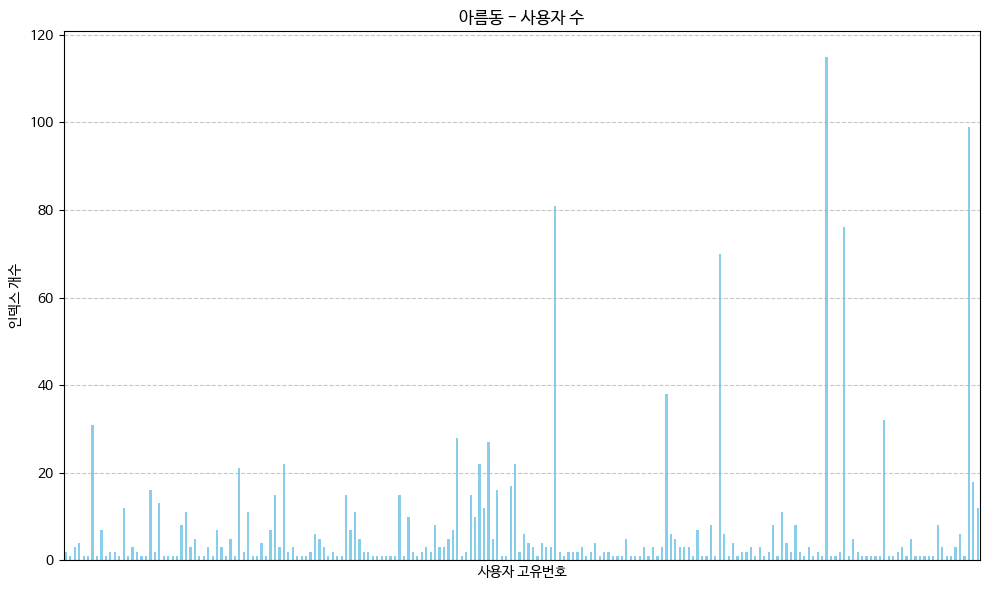

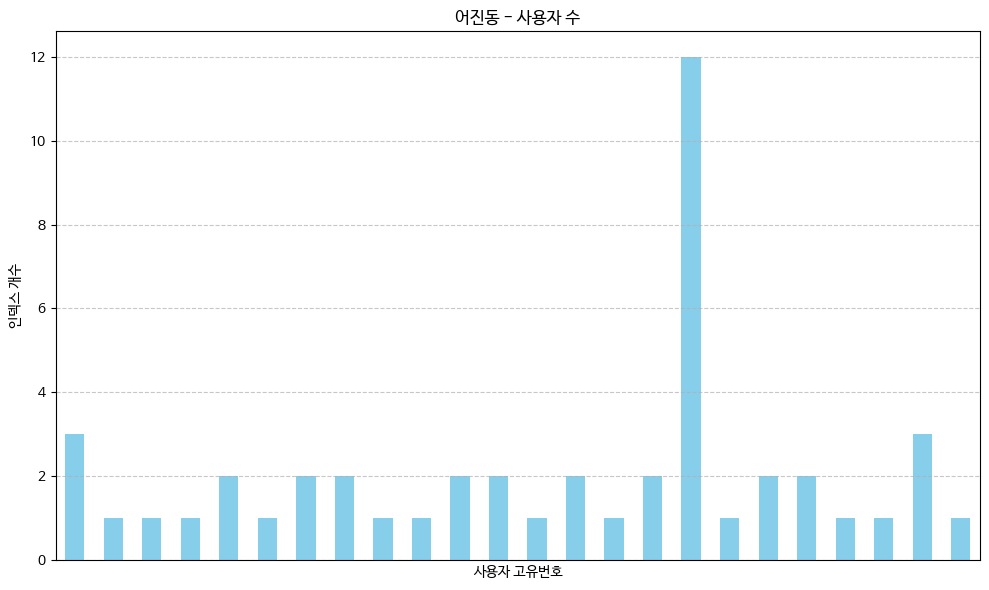

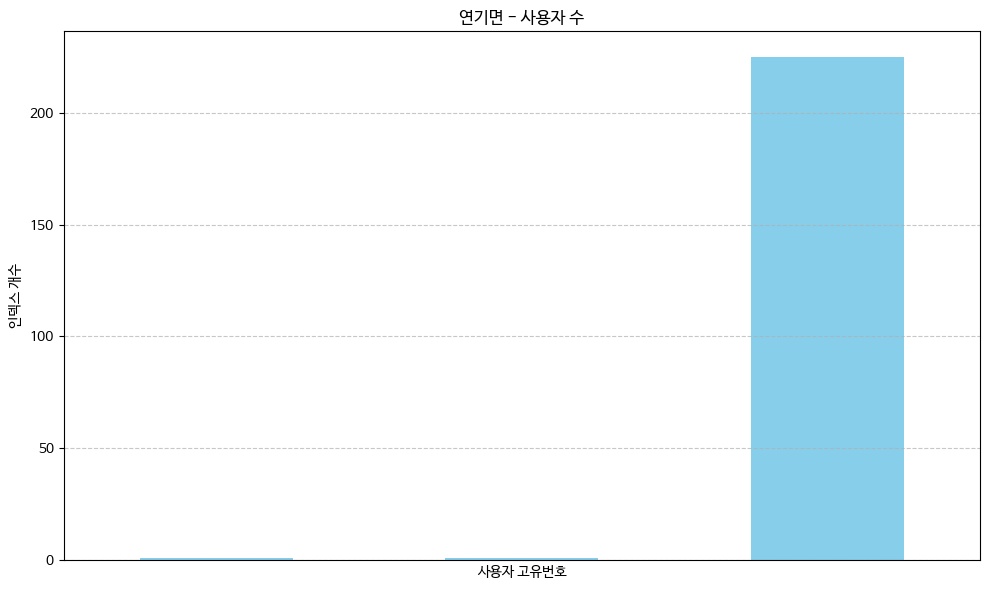

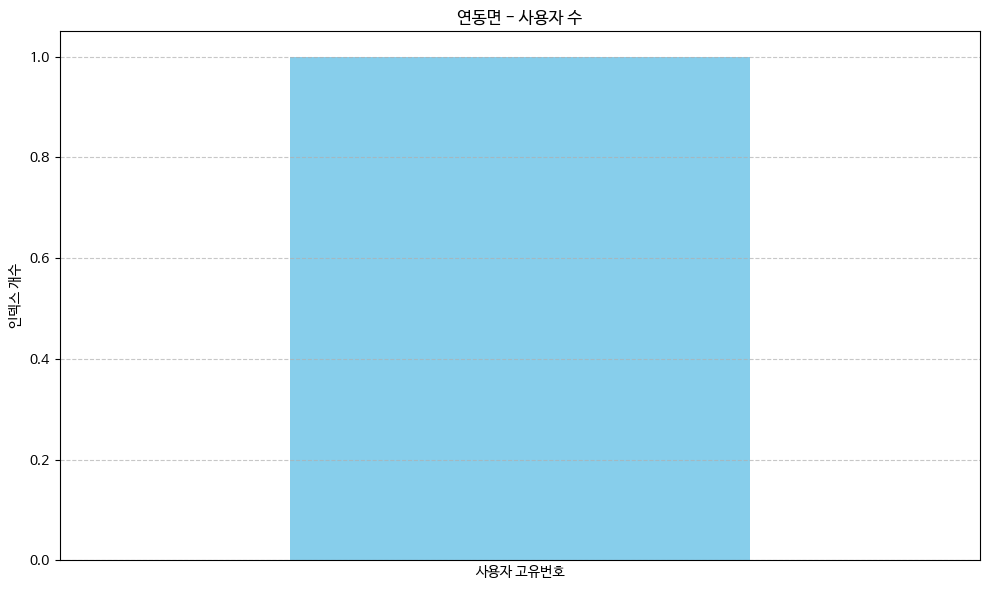

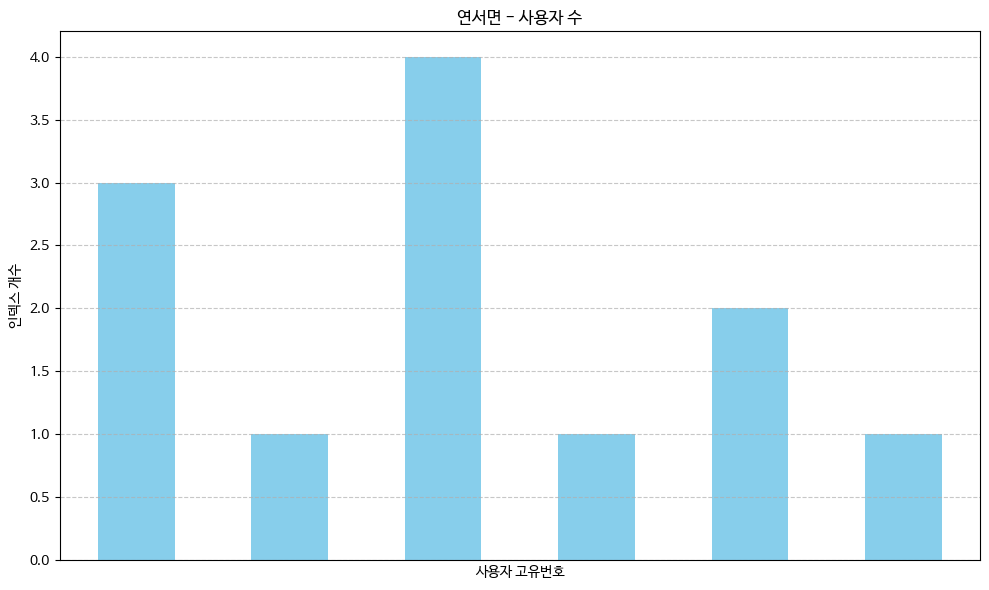

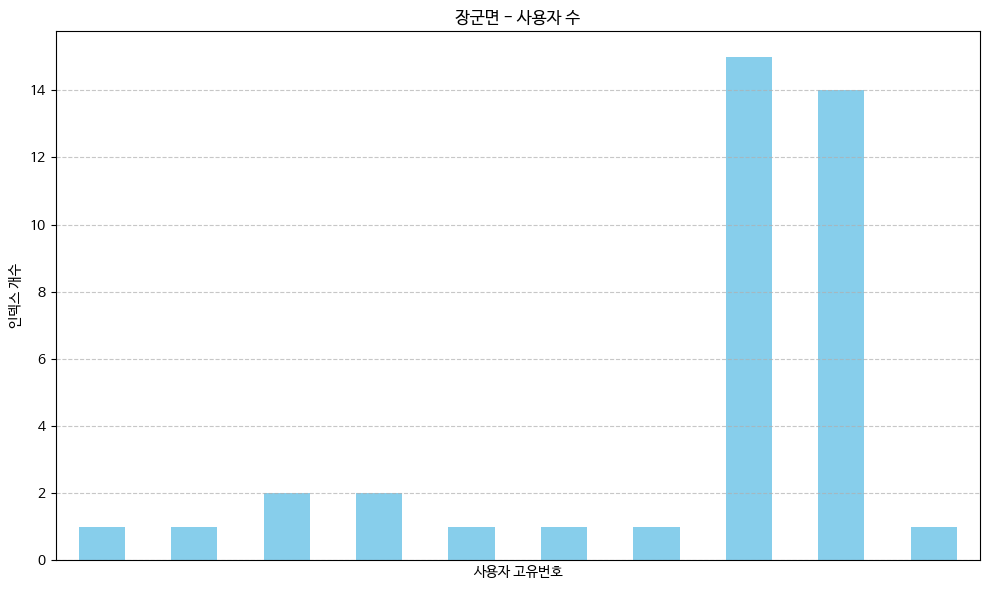

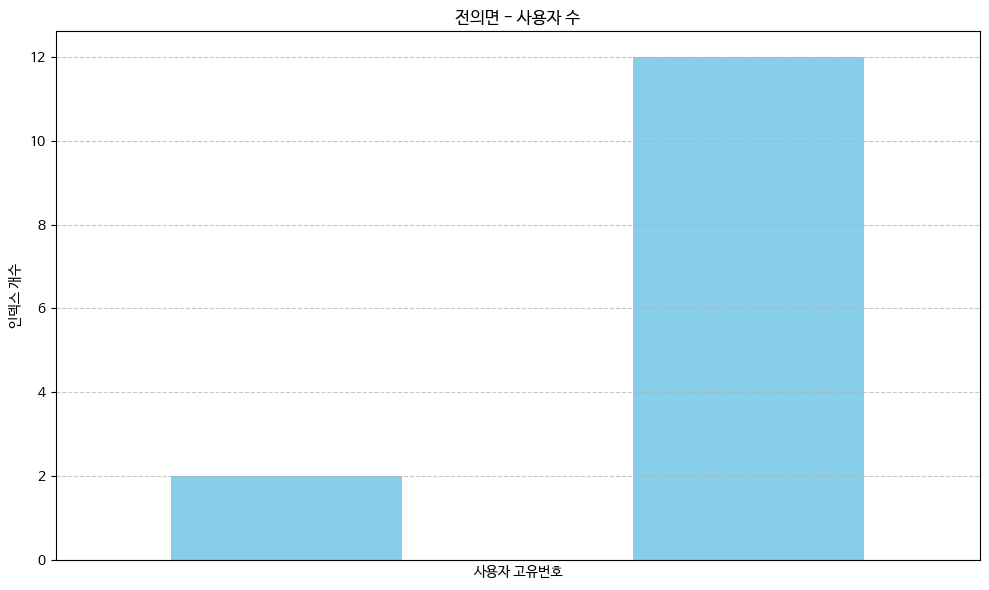

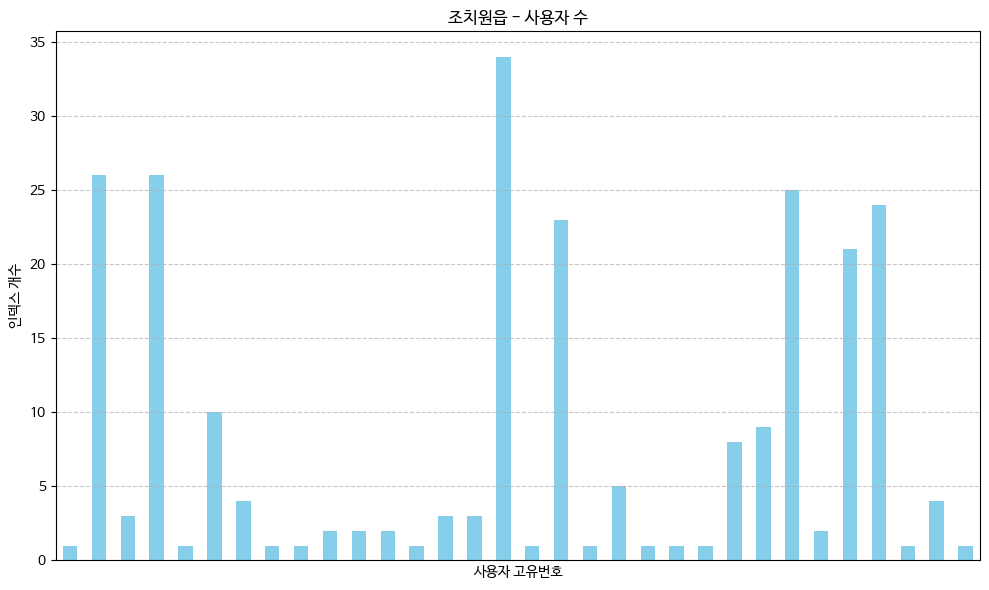

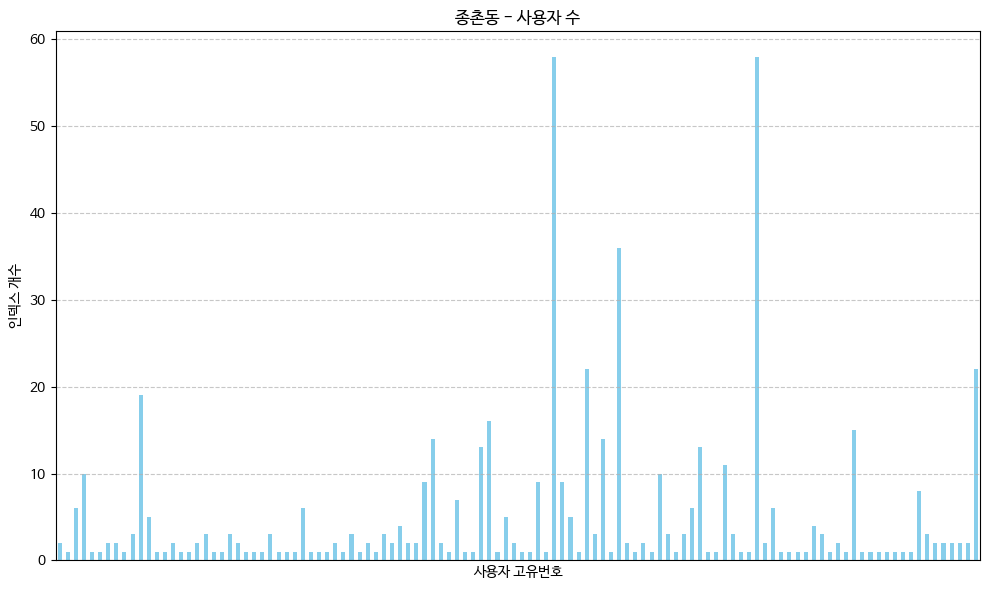

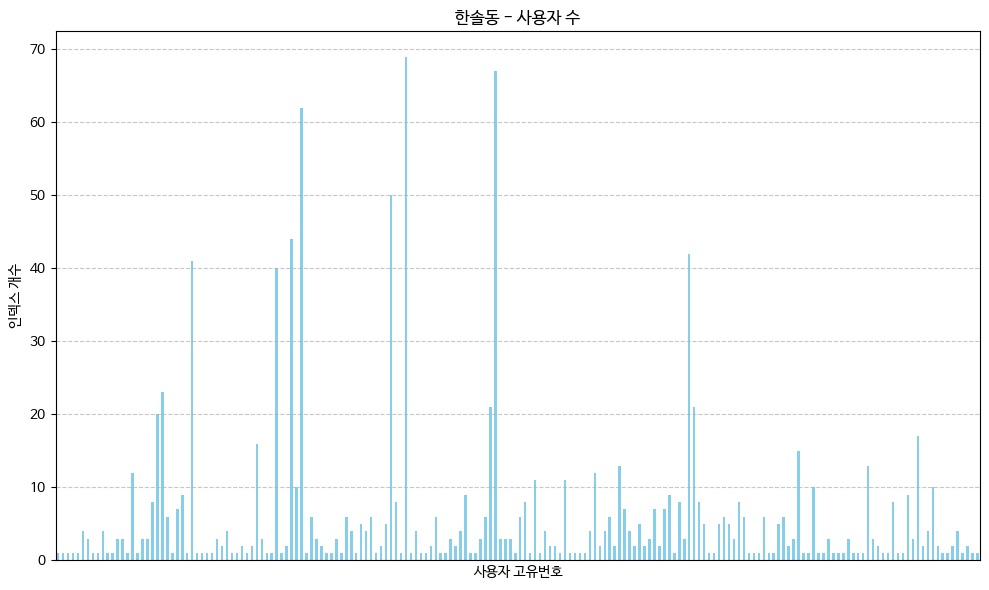

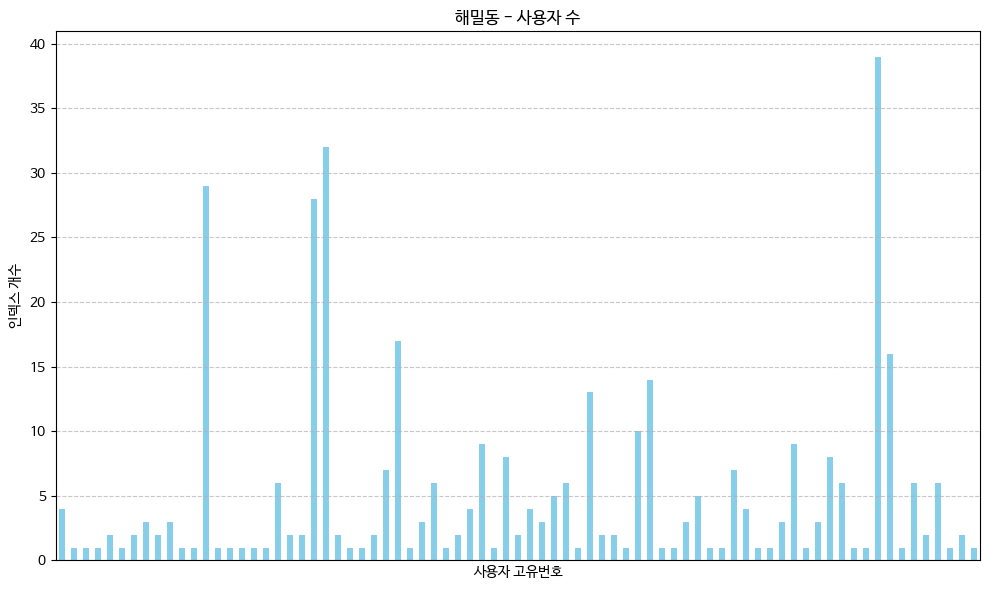

In [33]:
#다른 도시는 어떨까
grouped = base_stress.groupby('행정동명')

# 모든 '행정동명'에 대해 반복
for name, group in grouped:
    # '사용자 고유번호'별로 그룹화하고 인덱스 개수 세기
    index_counts = group.groupby('사용자 고유번호').size()

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    index_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('사용자 고유번호')
    plt.ylabel('인덱스 개수')
    plt.title(f'{name} - 사용자 수')
    plt.xticks([])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [69]:
def draw_radar_chart(df, rows, features):
    # 특정 행들의 평균 계산
    avg_values = df.loc[rows, features].mean()

    # 각 열의 평균값을 딕셔너리로 변환
    avg_dict = avg_values.to_dict()

    # 각 꼭짓점에 해당하는 label 설정
    labels = features
    num_vars = len(labels)

    # 각 꼭짓점의 각도 설정
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # 첫 번째 값을 마지막에 추가해서 원형으로 만듦

    # 레이더 차트 그리기
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # 데이터 준비
    values = []
    for feature in features:
        if feature.endswith('단계'):
            max_val = 5
        else:
            max_val = 100
        # 비율로 변환
        scaled_value = (avg_dict[feature] / max_val) * 100
        values.append(scaled_value)

    values += values[:1]  # 첫 번째 값을 마지막에 추가해서 원형으로 만듦

    # 레이더 차트 그리기
    ax.fill(angles, values, color='red', alpha=0.25)
    ax.plot(angles, values, color='red', linewidth=2)

    # 각 꼭짓점의 label 설정
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # 그리드 선 및 label 설정
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_yticklabels(['20', '40', '60', '80', '100'])

    # 각 꼭짓점 옆에 데이터 값 표시
    for i, value in enumerate(values[:-1]):
        angle_rad = angles[i]
        ax.text(angle_rad, value + 5, f'{value:.1f}', horizontalalignment='center', size=12, color='black')

    # 제목 설정: rows의 개수를 제목으로 설정
    row_count = len(df.loc[rows])
    plt.title(f'Radar Chart (n= {row_count})', size=20, color='blue', y=1.1)

    plt.show()

    # 평균값 딕셔너리 반환
    return avg_dict

# 함수 호출 예시
# avg_dict = draw_radar_chart(df_stress, rows=df_stress['성별'] == 'M', features=['피로도 값', '신체스트레스 값', '정신스트레스 값', '심장안정도 값', '스트레스대처능력 값'])
# 2번째 매개변수에 df_stress.index 하면 전체 항목 전달
# features=['말초혈관탄성도 값','동맥혈관탄성도 값','혈관단계']

In [72]:
def compare_dicts(dict1, dict2, label1='Dict1', label2='Dict2'):
    # 두 딕셔너리에서 공통 key 찾기
    common_keys = dict1.keys() & dict2.keys()

    # 공통 key에 대해 value의 차이를 계산
    differences = {key: dict2[key] - dict1[key] for key in common_keys}

    # 막대 그래프 그리기
    keys = list(differences.keys())
    values = list(differences.values())

    # 막대를 가운데에 놓기 위해 offset을 지정
    y_pos = np.arange(len(keys))

    plt.barh(y_pos, values, align='center', color=['blue' if x >= 0 else 'red' for x in values])
    plt.yticks(y_pos, keys)
    plt.axvline(0, color='black', linewidth=0.5)  # 축을 가운데에 위치
    plt.xlabel('Difference')
    plt.title(f'{label1}  vs {label2} (높을수록 좋은거)')

    plt.show()

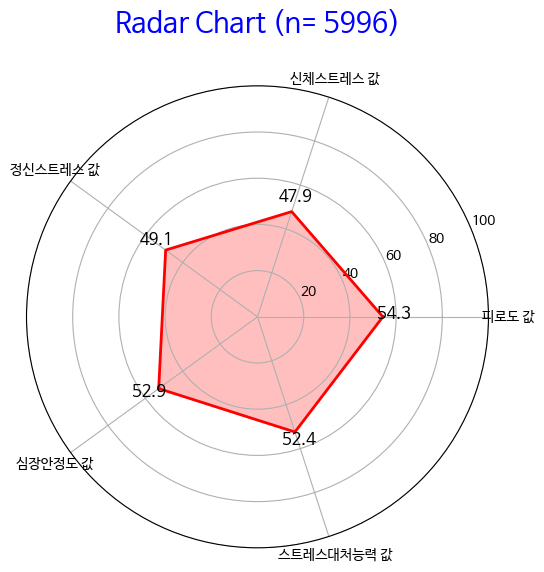

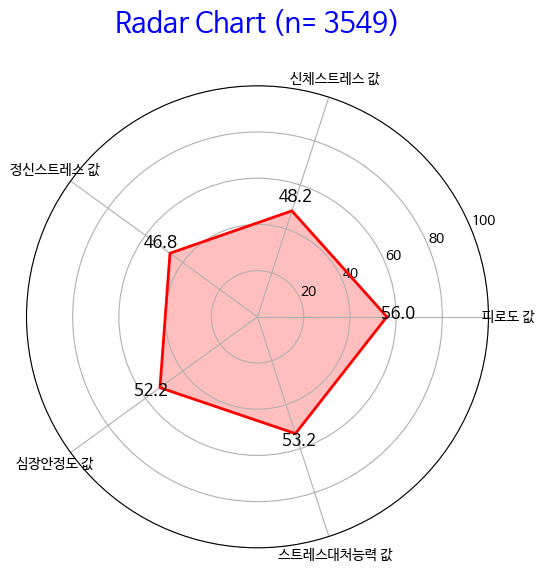

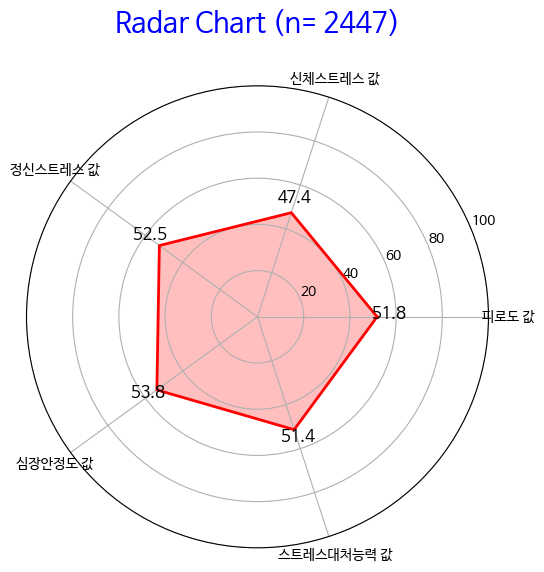

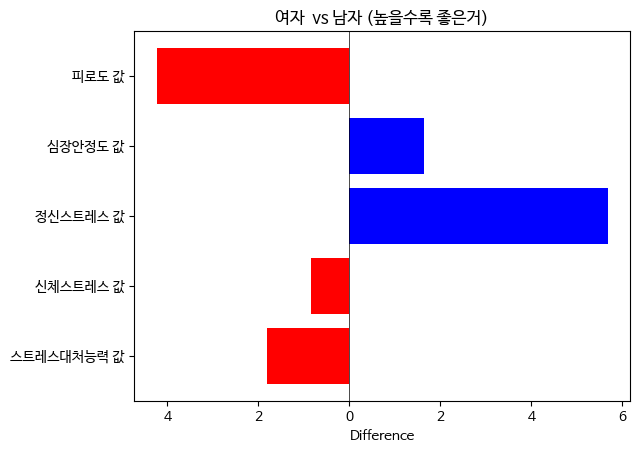

{'피로도 값': 55.99338686954072,
 '신체스트레스 값': 48.22605804451958,
 '정신스트레스 값': 46.82528036066497,
 '심장안정도 값': 52.182592279515355,
 '스트레스대처능력 값': 53.159050436742746}

In [73]:
draw_radar_chart(df_stress, df_stress.index, features=['피로도 값', '신체스트레스 값', '정신스트레스 값', '심장안정도 값', '스트레스대처능력 값'])
avg_dict_F = draw_radar_chart(df_stress, rows=df_stress['성별'] == 'F', features=['피로도 값', '신체스트레스 값', '정신스트레스 값', '심장안정도 값', '스트레스대처능력 값'])
avg_dict_M= draw_radar_chart(df_stress, rows=df_stress['성별'] == 'M', features=['피로도 값', '신체스트레스 값', '정신스트레스 값', '심장안정도 값', '스트레스대처능력 값'])

compare_dicts(avg_dict_F,avg_dict_M,'여자','남자')
avg_dict_F

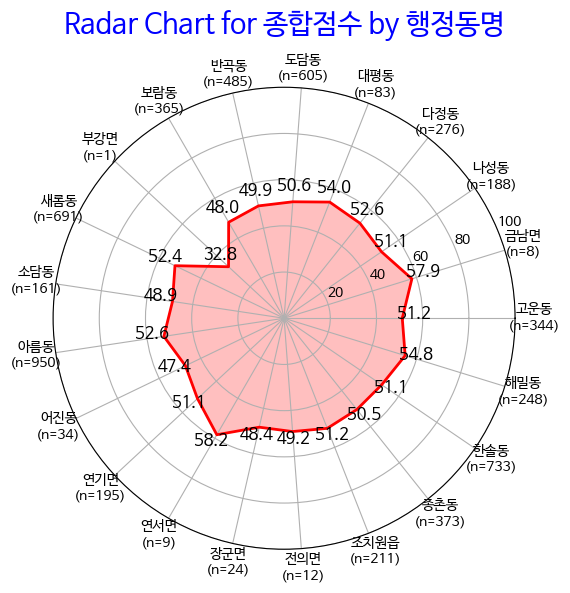

In [76]:
def draw_radar_chart_group(df, group_column, feature):
    # 그룹별 평균 계산
    avg_values = df.groupby(group_column)[feature].mean()

    # 각 그룹의 데이터 개수 계산
    count_values = df.groupby(group_column).size()

    # 레이더 차트 그리기
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # 각 꼭짓점에 해당하는 label 설정
    labels = [f'{label}\n(n={count})' for label, count in zip(avg_values.index, count_values)]  # '행정동명 (n=개수)' 형태로 표시
    num_vars = len(labels)

    # 각 꼭짓점의 각도 설정
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # 첫 번째 값을 마지막에 추가해서 원형으로 만듦

    # 레이더 차트에 그릴 데이터 준비
    values = avg_values.tolist()
    values += values[:1]  # 첫 번째 값을 마지막에 추가해서 원형으로 만듦

    # 레이더 차트 그리기
    ax.fill(angles, values, color='red', alpha=0.25)
    ax.plot(angles, values, color='red', linewidth=2)

    # 각 꼭짓점의 label 설정
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # 그리드 선 및 label 설정
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_yticklabels(['20', '40', '60', '80', '100'])

    # 각 꼭짓점 옆에 데이터 값 표시
    for i, value in enumerate(values[:-1]):
        angle_rad = angles[i]
        ax.text(angle_rad, value + 5, f'{value:.1f}', horizontalalignment='center', size=12, color='black')

    # 제목 설정
    plt.title(f'Radar Chart for {feature} by {group_column}', size=20, color='blue', y=1.1)

    plt.show()

    # 평균값 시리즈 반환
    return avg_values, count_values

# 함수 호출 예시
avg_dict_count, count_dict = draw_radar_chart_group(
    df_stress,
    group_column='행정동명',
    feature='종합점수'
)

#print(avg_dict_count)
#print(count_dict)


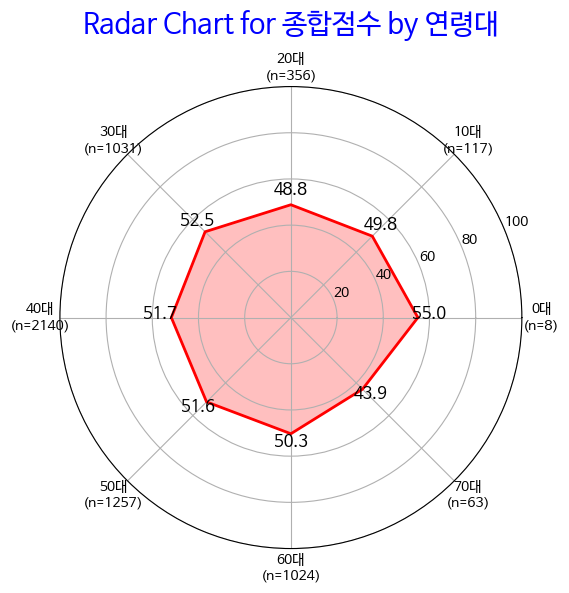

(연령대
 0대     54.980000
 10대    49.833419
 20대    48.837781
 30대    52.519709
 40대    51.745491
 50대    51.623055
 60대    50.297529
 70대    43.851270
 Name: 종합점수, dtype: float64,
 연령대
 0대        8
 10대     117
 20대     356
 30대    1031
 40대    2140
 50대    1257
 60대    1024
 70대      63
 dtype: int64)

In [78]:
draw_radar_chart_group( adf_stress,
    group_column='연령대',
    feature='종합점수'
)

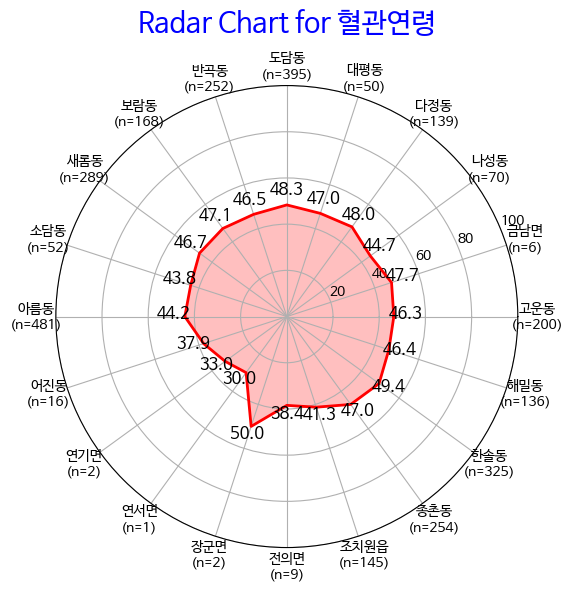

(행정동명
 고운동     46.320000
 금남면     47.666667
 나성동     44.671429
 다정동     47.985612
 대평동     46.960000
 도담동     48.324051
 반곡동     46.519841
 보람동     47.130952
 새롬동     46.709343
 소담동     43.769231
 아름동     44.155925
 어진동     37.875000
 연기면     33.000000
 연서면     30.000000
 장군면     50.000000
 전의면     38.444444
 조치원읍    41.255172
 종촌동     47.023622
 한솔동     49.350769
 해밀동     46.441176
 Name: 혈관연령, dtype: float64,
 행정동명
 고운동     200
 금남면       6
 나성동      70
 다정동     139
 대평동      50
 도담동     395
 반곡동     252
 보람동     168
 새롬동     289
 소담동      52
 아름동     481
 어진동      16
 연기면       2
 연서면       1
 장군면       2
 전의면       9
 조치원읍    145
 종촌동     254
 한솔동     325
 해밀동     136
 dtype: int64)

In [37]:
draw_radar_chart_group( df_vessel,
    group_column='행정동명',
    feature='혈관연령'
)

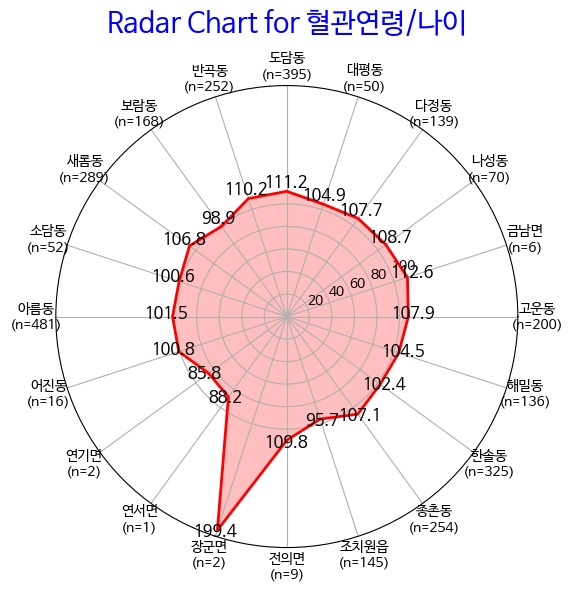

(행정동명
 고운동     107.911111
 금남면     112.604948
 나성동     108.650501
 다정동     107.675697
 대평동     104.874654
 도담동     111.191466
 반곡동     110.171847
 보람동      98.868403
 새롬동     106.795127
 소담동     100.565689
 아름동     101.488426
 어진동     100.792065
 연기면      85.805423
 연서면      88.235294
 장군면     199.404762
 전의면     109.841270
 조치원읍     95.712901
 종촌동     107.113726
 한솔동     102.413151
 해밀동     104.471344
 Name: 혈관연령/나이, dtype: float64,
 행정동명
 고운동     200
 금남면       6
 나성동      70
 다정동     139
 대평동      50
 도담동     395
 반곡동     252
 보람동     168
 새롬동     289
 소담동      52
 아름동     481
 어진동      16
 연기면       2
 연서면       1
 장군면       2
 전의면       9
 조치원읍    145
 종촌동     254
 한솔동     325
 해밀동     136
 dtype: int64)

In [38]:
df_vessel['혈관연령/나이']=df_vessel['혈관연령']*100/adf_vessel['나이']
draw_radar_chart_group( df_vessel,
    group_column='행정동명',
    feature='혈관연령/나이')

#리턴된 딕셔너리 값을 이용해서 두 개의 표본 비교